In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pruning_type = 'head'
block_num = 5

## helper function

In [3]:
def get_prune_after_accuracy(algo_name, pruning_type = pruning_type, block_num = block_num):
    
    if pruning_type in ['head', 'neuron']:
        result_path = os.path.join('./results', pruning_type, str(block_num), algo_name) 
    elif pruning_type in ['head_whole']:
        result_path = os.path.join('./results', pruning_type, algo_name)
    else:
        raise Exception("Invalid pruning type")
    
    prune_order = np.load(os.path.join(result_path, "prune_order.npy"))
    prune_after_accuracy = np.load(os.path.join(result_path, "prune_after_accuracy.npy"))
    return prune_order, prune_after_accuracy

## load results

In [4]:
_, Random = get_prune_after_accuracy('random')
_, UCB1 = get_prune_after_accuracy('UCB1')
_, EpsilonGreedy = get_prune_after_accuracy('EpsilonGreedy')
_, AnnealingEpsilonGreedy = get_prune_after_accuracy('AnnealingEpsilonGreedy')
_, Softmax = get_prune_after_accuracy('Softmax')
_, AnnealingSoftmax = get_prune_after_accuracy('AnnealingSoftmax')
_, Hedge = get_prune_after_accuracy('Hedge')
_, Exp3 = get_prune_after_accuracy('Exp3')

## plot

In [5]:
matplotlib.rc('font', size=12) #, weight='bold')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

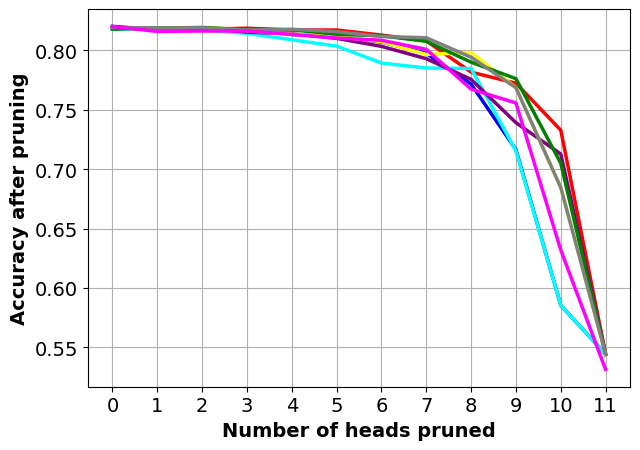

In [6]:
fig = plt.figure(figsize=(7, 5), dpi=100)
ax = fig.add_subplot(111)
N = len(UCB1)
## necessary variables
ind = np.arange(N)                # the x locations for the groups

# bandits
plt.plot(ind , UCB1 , color="blue", linewidth=2.5, linestyle="-", label="UCB1")
plt.plot(ind , EpsilonGreedy, color="red", linewidth=2.5, linestyle="-", label="Epsilon Greedy")
plt.plot(ind , AnnealingEpsilonGreedy, color="cyan", linewidth=2.5, linestyle="-", label="Annealing Epsilon Greedy")
plt.plot(ind , Softmax, color="purple", linewidth=2.5, linestyle="-", label="Softmax")
plt.plot(ind , AnnealingSoftmax, color="yellow", linewidth=2.5, linestyle="-", label="Annealing Softmax")
plt.plot(ind , Hedge, color="green", linewidth=2.5, linestyle="-", label="Hedge")
plt.plot(ind , Exp3, color="grey", linewidth=2.5, linestyle="-", label="Exp3")

# random
plt.plot(ind , Random, color="magenta", linewidth=2.5, linestyle="-", label="Random")

# plt.legend(loc = 3)
# plt.legend(ncol=8, bbox_to_anchor=(1.05, 1))
plt.xlabel('Number of heads pruned', fontweight='bold', fontsize='14')
plt.ylabel('Accuracy after pruning', fontweight='bold', fontsize='14')
ax.set_xticks(ind)
# ax.set_yticks(np.arange(0.75, 0.83, 0.01))
# ax.set_yticks(np.arange(0.60, 0.85, 0.0))
plt.grid(True)

plt.show()

# plot only one bandit algo

In [7]:
pruning_type = 'head'
algo_name = 'Softmax'

In [8]:
matplotlib.rc('font', size=12) #, weight='bold')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

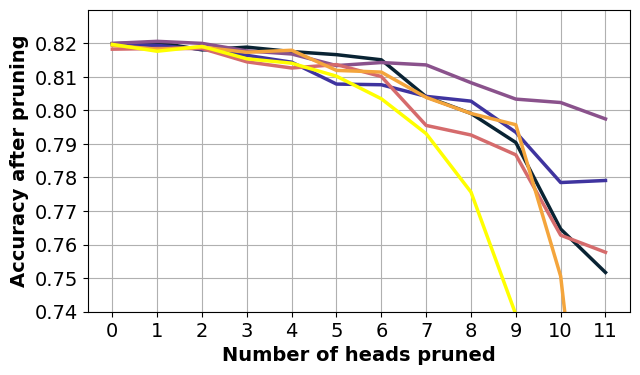

In [9]:
fig = plt.figure(figsize=(7, 4), dpi=100)
ax = fig.add_subplot(111)
N = 12
## necessary variables
ind = np.arange(N)                # the x locations for the groups

color_list = ['#092333', '#3F349F', '#8A528C', '#D56B6C', '#F4A53C', 'yellow']
for block_num in range(6):
    label = 'block ' + str(block_num)
    _, prune_accuracy = get_prune_after_accuracy(algo_name, block_num = block_num)
    plt.plot(ind , prune_accuracy , color=color_list[block_num], linewidth=2.5, linestyle="-", label=label)

# plt.legend(loc = 3)
# plt.legend(ncol=8, bbox_to_anchor=(1, 3))
plt.xlabel('Number of heads pruned', fontweight='bold', fontsize='14')
plt.ylabel('Accuracy after pruning', fontweight='bold', fontsize='14')
ax.set_xticks(ind)
ax.set_ylim([0.74, 0.83])
ax.set_yticks(np.arange(0.74, 0.83, 0.01))
plt.grid(True)

plt.show()
    